In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
trial_df=pd.read_csv(clinical_trial_data_to_load)
trial_df.head()
# Combine the data into a single dataset
merge_table = pd.merge(mouse_df, trial_df, how='inner',on="Mouse ID")
merge_table.head()
# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Group_tumor=merge_table.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'}).reset_index()
Group_tumor.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Group_tumor_SEM=merge_table.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'sem'}).reset_index()
Group_tumor_SEM.head()
# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = pd.pivot_table(Group_tumor, values='Tumor Volume (mm3)', index=['Timepoint'],
                    columns=['Drug'], aggfunc=np.sum).reset_index()
pivot_table.head()

# Preview that Reformatting worked


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


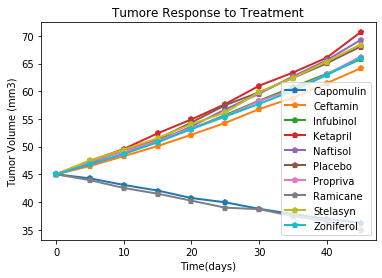

In [8]:

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = pivot_table['Timepoint']
All_Columns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol', 'Placebo', 
            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
for y in All_Columns:
       
    plt.plot(x_axis, pivot_table[y], '-p', 
         markersize=7, linewidth=2,
         markeredgewidth=0.2, label=y )
   


plt.title("Tumore Response to Treatment")
plt.xlabel('Time(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend( loc="best")
plt.show()
# Create a random array of data that we will use for our y values


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Group_tumor_met=merge_table.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'mean'}).reset_index()
Group_tumor_met.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Group_tumor_metsem=merge_table.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'sem'}).reset_index()
Group_tumor_metsem.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_met = pd.pivot_table(Group_tumor_met, values='Metastatic Sites', index=['Timepoint'],
                    columns=['Drug'], aggfunc=np.sum).reset_index()
pivot_table_met.head()
# Preview that Reformatting worked

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_metsem = pd.pivot_table(Group_tumor_metsem, values='Metastatic Sites', index=['Timepoint'],
                    columns=['Drug'], aggfunc=np.sum).reset_index()
pivot_table_metsem.head()
# Preview that Reformatting worked

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


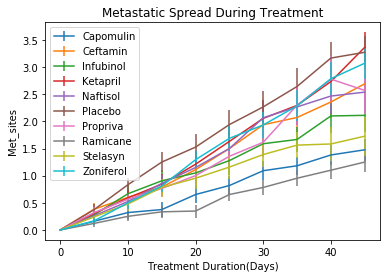

In [15]:
# List of values from 0 to 100 each value being 1 greater than the last
for y in All_Columns:      
    plt.errorbar(x_axis, pivot_table_met[y], yerr=pivot_table_metsem[y], label=y)
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met_sites')
plt.legend( loc="best")
plt.show()

## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
Survival_GRP=merge_table.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'}).rename(columns={
    'Mouse ID':'Mouse Count'}).reset_index()

Survival_GRP.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
Survival_GRP_Pivot = pd.pivot_table(Survival_GRP, values='Mouse Count', index=['Timepoint'],
                    columns=['Drug'], aggfunc=np.sum).reset_index()
Survival_GRP_Pivot.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


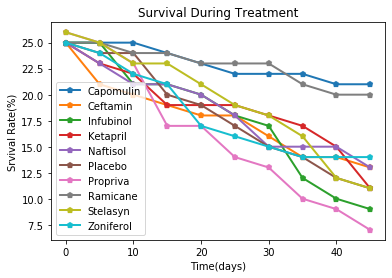

In [24]:
# Generate the Plot (Accounting for percentages)
for y in All_Columns:
       
    plt.plot(x_axis, Survival_GRP_Pivot[y], '-p', 
         markersize=7, linewidth=2,
         markeredgewidth=0.2, label=y )
   


plt.title("Survival During Treatment")
plt.xlabel('Time(days)')
plt.ylabel('Srvival Rate(%)')
plt.legend( loc="best")
plt.show()
# Save the Figure

# Show the Figure


## Summary Bar Graph

In [29]:
merge_table_StartEnd=merge_table[merge_table['Timepoint'].isin([0,45])]
merge_table_StartEnd.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
8,x402,Stelasyn,0,45.000000,0
17,x402,Stelasyn,45,61.619606,3
18,a492,Stelasyn,0,45.000000,0
27,a492,Stelasyn,45,60.122011,1


In [31]:
merge_table_StartEnd_GRP=merge_table_StartEnd.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'}).reset_index()
merge_table_StartEnd_GRP.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,45,36.236114
2,Ceftamin,0,45.000000
3,Ceftamin,45,64.132421
4,Infubinol,0,45.000000
5,Infubinol,45,65.755562
6,Ketapril,0,45.000000
7,Ketapril,45,70.662958
8,Naftisol,0,45.000000
9,Naftisol,45,69.265506


In [38]:
merge_table_StartEnd_GRP_Pivot = pd.pivot_table(merge_table_StartEnd_GRP, values='Tumor Volume (mm3)', index=['Drug'],
                    columns=['Timepoint'], aggfunc=np.sum).reset_index()
merge_table_StartEnd_GRP_Pivot.columns=['Drug', '0', '45']
merge_table_StartEnd_GRP_Pivot['PercentChange']=100*(merge_table_StartEnd_GRP_Pivot['45']-merge_table_StartEnd_GRP_Pivot['0'])/merge_table_StartEnd_GRP_Pivot['0']
merge_table_StartEnd_GRP_Pivot.head()

,Drug,0,45,PercentChange
0,Capomulin,45.0,36.236114,-19.475303
1,Ceftamin,45.0,64.132421,42.516492
2,Infubinol,45.0,65.755562,46.123472
3,Ketapril,45.0,70.662958,57.028795
4,Naftisol,45.0,69.265506,53.923347


In [41]:
merge_table_StartEnd_GRP_Pivot['FailvsPass']='Pass'
merge_table_StartEnd_GRP_Pivot.loc[merge_table_StartEnd_GRP_Pivot['PercentChange']<0,'FailvsPass']='Fail'
merge_table_StartEnd_GRP_Pivot

,Drug,0,45,PercentChange,FailvsPass
0,Capomulin,45.0,36.236114,-19.475303,Fail
1,Ceftamin,45.0,64.132421,42.516492,Pass
2,Infubinol,45.0,65.755562,46.123472,Pass
3,Ketapril,45.0,70.662958,57.028795,Pass
4,Naftisol,45.0,69.265506,53.923347,Pass
5,Placebo,45.0,68.084082,51.297960,Pass
6,Propriva,45.0,66.258529,47.241175,Pass
7,Ramicane,45.0,34.955595,-22.320900,Fail
8,Stelasyn,45.0,68.438310,52.085134,Pass
9,Zoniferol,45.0,65.960888,46.579751,Pass


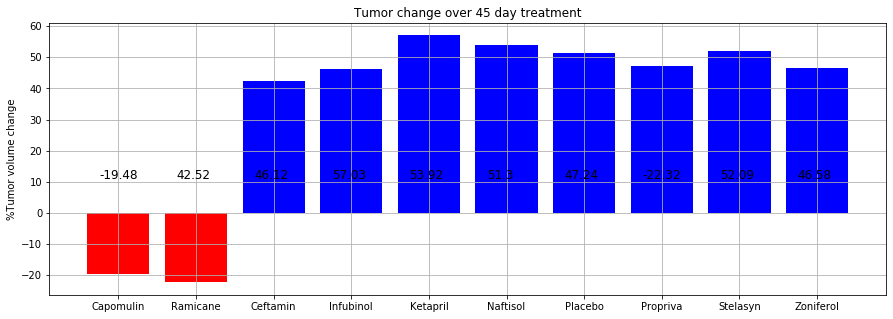

In [82]:
X_new=merge_table_StartEnd_GRP_Pivot['Drug']
y_new=merge_table_StartEnd_GRP_Pivot['PercentChange']
# merge_table_StartEnd_GRP_Pivot.ix[5].plot(kind='bar'); plt.axhline(0, color='k')
plt.figure(figsize=(15,5))
plt.grid()

Perc_Post = y_new < 0
Perc_Negt = y_new > 0

plt.bar(X_new[Perc_Post], y_new[Perc_Post], color = 'red')
plt.bar(X_new[Perc_Negt], y_new[Perc_Negt], color = 'blue')

Label_old=y_new.tolist()
labels = [ round(elem, 2) for elem in Label_old ]

for i, v in enumerate(labels):
    plt.text(i-.25, 
              v/labels[i]+10, 
              labels[i], 
              fontsize=12)


# plt.bar(X_new,y_new)
plt.title('Tumor change over 45 day treatment')
plt.ylabel('%Tumor volume change')

plt.show()